# Takeoff

This section computes parameters related to HL devices for the example aiplane in takeoff conditions. The drag polar in takeoff condition is also plotted, and the maximum $L/D$ is also determined. Based on constraint analysis, the $C_{L_{max_{TO}}}$ is 1.8 for the example airplane. Note that $C_{L_{max}}$ is 1.44, computed in aerodynamics section. Using these values and the process outlined earlier, below code block computes various parameters related to HL devices for takeoff conditions.

In [1]:
# Variables
CLmax = 1.44
CLmaxTO = 1.8
Sf = 58.1 # sq ft
Sref = 134 # sq ft
K = 0.93 # from figure 7.4, Roskam Part 2
cf_c = 0.25
delta_alpha_Clzero = -9 # deg, assumed from Raymer
Clalpha = 0.116 # 1/deg for NACA 23018
alpha_CLzero = -1 # from aerodynamics section

# Requried change in Cl
delta_CLmax = 1.05*(CLmaxTO - CLmax)
delta_Clmax = delta_CLmax * Sref / Sf
delta_Cl = delta_Clmax / K

print(f"Required change in airfoil sectional Cl: {delta_Cl:.2f}")

# Computed change in Cl
# Change the value of delta_f and alpha_delta_f until computed value is same as required
delta_f = 16 # deg
alpha_delta_f = 0.5 # fromdelta_f value and figure 7.8, Roskam Part 2
delta_Cl_comp = Clalpha * alpha_delta_f * delta_f

print(f"Computed change in airfoil sectional Cl with flap deflection of {delta_f} deg: {delta_Cl_comp:.2f}")

# change zero lift angle
delta_alpha_CLzero = delta_alpha_Clzero * Sf / Sref

# zero lift angle with TO flaps
alpha_flap_CLzero = alpha_CLzero + delta_alpha_CLzero

print(f"Zero-lift angle of attack with TO flaps: {alpha_flap_CLzero:.1f}  deg")

Required change in airfoil sectional Cl: 0.94
Computed change in airfoil sectional Cl with flap deflection of 16 deg: 0.93
Zero-lift angle of attack with TO flaps: -4.9  deg


Based on above calculation, it is determined that flap deflection of approximately 15 degrees is enough to achieve the maximum $C_L$ of 1.8 at takeoff conditions. Below code block plots the lift curve in takeoff conditions.

> __*NOTE*:__ The sinlge slotted flap used for example airplane does not change the lift curve slope, while having approximately same $\alpha$ for maximum $C_L$.

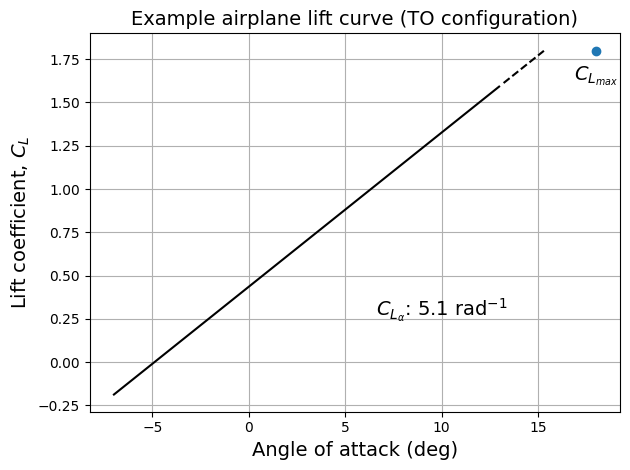

In [2]:
# Lift curve
import numpy as np
import matplotlib.pyplot as plt

fs = 14 # fontsize
alpha = np.linspace(-7,16,100) * np.pi/180 # alpha values, rad
CLalpha = 5.1
CLmaxTO = 1.8

CL = CLalpha * (alpha - alpha_flap_CLzero * np.pi/180)

# Splitting data based on linear and nonlinear region
CL_linear = CL[CL<=1.6]
alpha_linear = alpha[CL<=1.6]

CL_nonlinear = CL[np.logical_and(CL>1.6,CL<CLmaxTO)]
alpha_nonlinear = alpha[np.logical_and(CL>1.6,CL<CLmaxTO)]

fig, ax = plt.subplots()
ax.plot(alpha_linear*180/np.pi, CL_linear, "k-")
ax.plot(alpha_nonlinear*180/np.pi, CL_nonlinear, "k--")
ax.scatter(18, CLmaxTO)
ax.set_xlabel("Angle of attack (deg)", fontsize=fs)
ax.set_ylabel("Lift coefficient, $C_L$", fontsize=fs)
ax.set_title("Example airplane lift curve (TO configuration)", fontsize=fs)
ax.annotate(r"$C_{L_\alpha}$: " + f"{CLalpha:.2} " + r"$\text{rad}^{-1}$", (10,0.3), fontsize=fs, ha="center", va="center")
ax.annotate("$C_{L_{max}}$", (18,CLmaxTO-0.15), fontsize=fs, ha="center", va="center")
ax.grid()
plt.tight_layout()

## Takeoff Drag Polar

Once lift curve is obtained for the takeoff flap setting, one can plot the drag polar as well. As discussed in aerodynamics section, a simple drag polar model is used. With flaps deployed, one has to compute its effect on $C_{D_0}$ and $C_{L_i}$. As described in [high-lift devices](intro.md) section, the change in $C_{D_0}$ can be computed based on amount of flap deflection. To account for the change in induced drag, the value of $e$ is reduced by 0.05 (based on Table 3.6, Roskam Part 1). Since LG is not fully sized at this stage of design, increase in $C_{D_0}$ due to LG is set to 0.02. One should also account for the ground effect while computing takeoff drag polar. Section 12.6.4 in Raymer provides an equation to update $K$ to account for the ground effects. 

Below code block computes the change in zero-lift drag:

In [3]:
Ff = 0.0074
cf_c = 0.25
Sf = 58.1 # sq ft
Sref = 134 # sq ft
delta_f = 15 # deg

delta_CD0 = Ff * cf_c * Sf / Sref * (delta_f - 10) + 0.02

print(f"Change in zero-lift drag: {delta_CD0:2f}")

Change in zero-lift drag: 0.024011


Below code block plots the drag polar for example airplane in TO conditions:

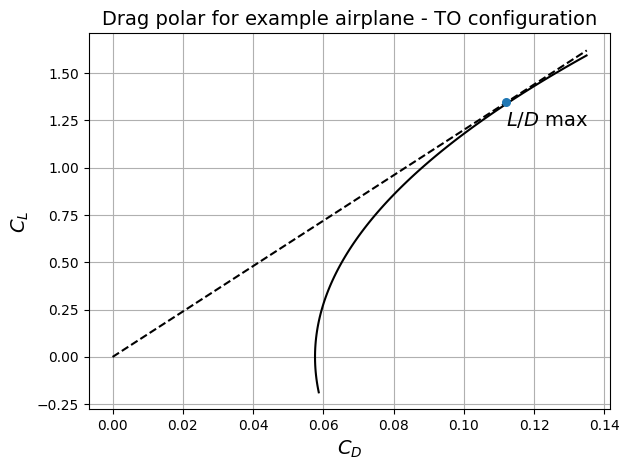

In [15]:
fs = 14 # fontsize
A = 8 # aspect ratio
CLalpha = 5.1 # 1/rad
alpha_CLzero = -4.9 # deg
e = 1.78*(1 - 0.045*A**0.68)-0.64 - 0.05 # e in TO
K = 1/np.pi/A/e
h = 4 # ft
b = 33 # ft
Keff = K * ( 33 * (h/b)**1.5 / ( 1 + 33 * (h/b)**1.5 ) ) # eq 12.60, Raymer

alpha = np.linspace(-7, 13, 100) # alpha in deg

CL = CLalpha * (alpha - alpha_CLzero) * np.pi / 180

CD0 = 0.03363 + delta_CD0 # zero-lift drag in TO conditions

CD = CD0 + Keff*CL**2 # drag model

fig, ax = plt.subplots()
ax.plot(CD, CL, "k-")
ax.plot([0.0, 0.135], [0.0, 1.62], "k--")
ax.scatter(0.112, 1.35, zorder=10, s=30)
ax.set_xlabel("$C_D$", fontsize=fs)
ax.set_ylabel("$C_L$", fontsize=fs)
ax.set_title("Drag polar for example airplane - TO configuration", fontsize=fs)
ax.annotate("$L/D$ max", (0.112,1.25), fontsize=fs, ha="left", va="center")
ax.grid()
plt.tight_layout()

As indicated in the above plot, the point where line from origin is tangent to drag polar refers to maximum $L/D$ in TO configuration. The example airplane has a maximum $L/D$ of 12. This concludes the HL devices sizing for TO condition. In next section, high-lift devices for landing configuration are sized.